In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/CoffeeAndCodeLT2018.csv")
data

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


## Время кодинга напрямую зависит от количества выпитого кофе

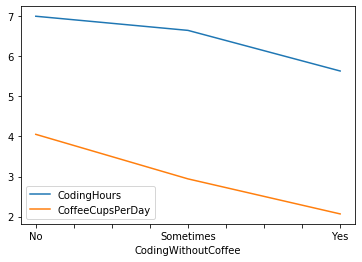

In [3]:
data.groupby(['CodingWithoutCoffee']).mean().plot()

## Эффективность кофе в зависимости от времени его употребления

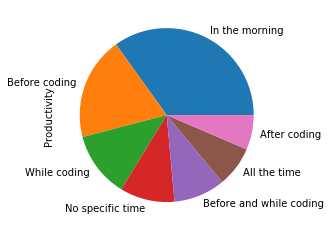

In [4]:
data_with_kpd = data.groupby(['CoffeeTime']).mean()
data_with_kpd['Productivity'] = data_with_kpd['CodingHours']/data_with_kpd['CoffeeCupsPerDay']
data_with_kpd['Efficiency'] = data_with_kpd['Productivity']/data_with_kpd['Productivity'].max()
data_with_kpd = data_with_kpd.sort_values('Efficiency', ascending=False)
data_with_kpd['Productivity'].plot.pie()

## Эффективность кофе в зависимости от его типа

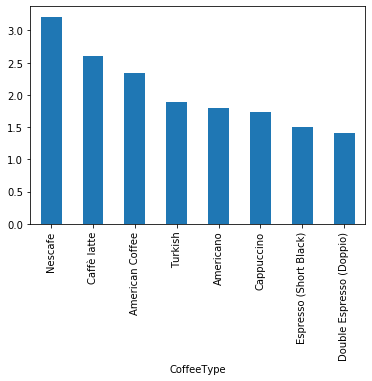

In [5]:
coffee_type = data.groupby(['CoffeeType']).mean()
coffee_type['Productivity'] = coffee_type['CodingHours']/coffee_type['CoffeeCupsPerDay']
coffee_type['Efficiency'] = coffee_type['Productivity']/coffee_type['Productivity'].max()
coffee_type = coffee_type.sort_values('Efficiency', ascending=False)
coffee_type['Productivity'].plot.bar()

In [6]:
gender = data.groupby(['Gender']).mean()
gender['Productivity'] = gender['CodingHours']/gender['CoffeeCupsPerDay']
gender

,CodingHours,CoffeeCupsPerDay,Productivity
Gender,,,
Female,5.384615,2.269231,2.372881
Male,6.770270,3.108108,2.178261
